In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceshipobject-detection/data/val/labels/000000139.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000121.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000067.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000010.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000149.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000097.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000100.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000083.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000007.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000089.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000126.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000039.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000050.txt
/kaggle/input/spaceshipobject-detection/data/val/labels/000000105.txt
/kaggle/input/spaces

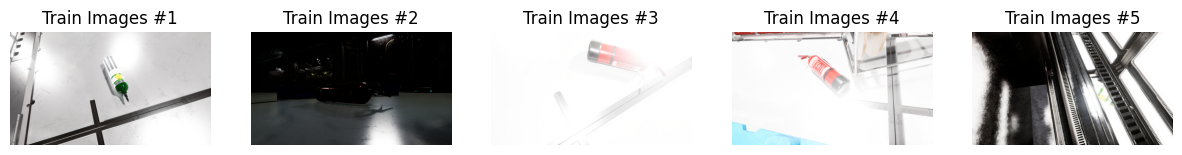

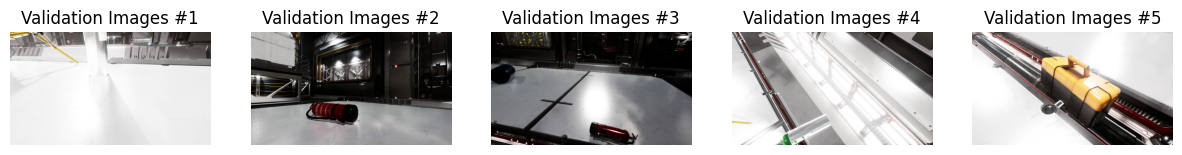

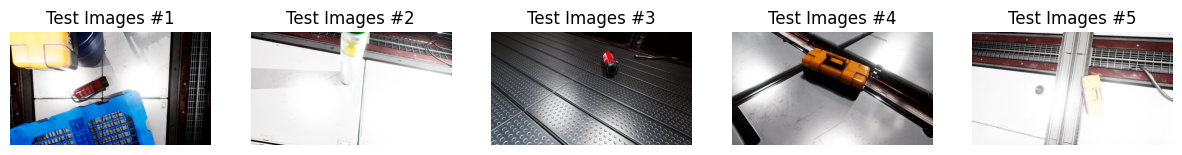

In [3]:
import os
import matplotlib.pyplot as plt
import cv2

# Set base path
base_path = '/kaggle/input/spaceshipobject-detection/data'

def show_images(split, title, num_images=5):
    image_dir = os.path.join(base_path, split, 'images')
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    plt.figure(figsize=(15, 3))
    count = 0
    for img_name in image_files:
        img_path = os.path.join(image_dir, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Could not read {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_images, count + 1)
        plt.imshow(img)
        plt.title(f"{title} #{count+1}")
        plt.axis('off')
        count += 1
        if count >= num_images:
            break
    plt.show()

# Display samples from each split
show_images('train', 'Train Images')
show_images('val', 'Validation Images')
show_images('test', 'Test Images')

In [4]:
data_config = {
    "train": "/kaggle/input/spaceshipobject-detection/data/train/images",
    "val": "/kaggle/input/spaceshipobject-detection/data/val/images",
    "test": "/kaggle/input/spaceshipobject-detection/data/test/images",
    "names": {
        0: "Fire Extinguisher",
        1: "Toolbox",
        2: "Oxygen Tank"
    }
}
import yaml

with open("data.yaml", "w") as file:
    yaml.dump(data_config, file, default_flow_style=False)

In [ ]:
! pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [6]:
from ultralytics import YOLO

# Load a powerful model (switch to yolov8l.pt for larger capacity if needed)
model = YOLO('yolov8m.pt')

# Train with high-performance settings
results = model.train(
    data='/kaggle/working/data.yaml',   # Dataset configuration
    epochs=150,                         # Give it enough runway to converge
    batch=16,                           # Adjust based on GPU memory
    imgsz=640,                          # Standard image size
    optimizer='Adam',                   # Adaptive optimizer
    lr0=0.01,                           # Strong starting learning rate
    weight_decay=0.0005,                # Regularization
    dropout=0.1,                        # Optional: helps reduce overfitting
    cos_lr=True,                        # Cosine annealing for smooth LR decay
    warmup_epochs=3,                    # Stabilize early learning

    # Augmentations
    mosaic=0.7,
    mixup=0.2,
    hsv_h=0.1,
    fliplr=0.5,

    # Runtime configs
    amp=True,                           # Mixed precision = faster training
    device='cuda',
    workers=8,
    save_period=10,                     # Save every 10 epochs
    patience=30,                        # Early stopping if needed
    name='yolov8_map_optimized_run'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 227MB/s]


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.1, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=0.7, multi_scale=False, name=yolov8_map_optimized_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=30, perspective=0.0, plots=True, pose=12.0, 

100%|██████████| 755k/755k [00:00<00:00, 16.9MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 65.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 103.0±35.0 MB/s, size: 2900.0 KB)


train: Scanning /kaggle/input/spaceshipobject-detection/data/train/labels... 846 images, 5 backgrounds, 0 corrupt: 100%|██████████| 846/846 [00:11<00:00, 73.32it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/spaceshipobject-detection/data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 102.4±13.7 MB/s, size: 3015.9 KB)


val: Scanning /kaggle/input/spaceshipobject-detection/data/val/labels... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:02<00:00, 64.96it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/spaceshipobject-detection/data/val is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8_map_optimized_run/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8_map_optimized_run
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      6.11G      1.952      3.914       2.02         36        640: 100%|██████████| 53/53 [00:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        154        206          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      6.45G      2.225      2.972      2.283         30        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        154        206   2.89e-05     0.0111    1.5e-05   8.95e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      6.52G      2.027      2.669       2.11         45        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        154        206    0.00028     0.0111   3.52e-05   1.55e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      6.58G       1.96       2.53       2.06         38        640: 100%|██████████| 53/53 [00:28<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        154        206      0.407     0.0209    0.00799    0.00348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      6.65G      1.845        2.3      1.934         31        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        154        206      0.197      0.402      0.227      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      6.72G      1.789      2.247      1.894         46        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        154        206      0.284      0.469      0.313      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      7.01G      1.718      2.107      1.799         46        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.80it/s]

                   all        154        206      0.187      0.275       0.12     0.0412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      7.07G      1.778      2.148      1.855         39        640: 100%|██████████| 53/53 [00:28<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        154        206      0.551      0.368      0.437      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      7.14G      1.682      1.991       1.74         39        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        154        206      0.366      0.448      0.374      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      7.21G      1.646      1.975      1.733         39        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        154        206       0.61      0.408      0.487      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      7.34G      1.645      1.892      1.701         39        640: 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.97it/s]

                   all        154        206      0.521      0.313      0.306      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      6.65G      1.652      1.939      1.703         57        640: 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        154        206      0.514       0.47      0.517      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      6.93G      1.575      1.853       1.65         35        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        154        206      0.645       0.49      0.564      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      6.93G      1.609      1.823      1.677         35        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        154        206      0.578      0.497      0.537      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      6.93G       1.53      1.781      1.636         50        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]

                   all        154        206      0.594      0.523      0.547      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      6.96G      1.528      1.719      1.631         40        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        154        206       0.49      0.478      0.463      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      7.03G      1.585      1.766      1.672         43        640: 100%|██████████| 53/53 [00:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        154        206      0.679      0.519       0.55      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      7.09G      1.495      1.667      1.604         39        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        154        206      0.282      0.157      0.148     0.0808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      7.16G      1.519      1.673      1.617         31        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        154        206      0.552      0.483      0.486      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      7.23G      1.458      1.662      1.563         35        640: 100%|██████████| 53/53 [00:28<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        154        206        0.6      0.524      0.568      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      7.29G      1.455      1.686      1.576         38        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        154        206      0.543      0.498       0.48      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      7.36G      1.476      1.613      1.584         36        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.27it/s]

                   all        154        206      0.812      0.575      0.676      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      6.69G      1.441      1.592      1.549         26        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        154        206      0.774      0.496      0.562      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      6.97G      1.431      1.553      1.539         37        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        154        206       0.68      0.571      0.648      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      6.97G      1.386      1.518      1.514         33        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]

                   all        154        206      0.743      0.571      0.656      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      6.97G      1.484      1.643       1.59         35        640: 100%|██████████| 53/53 [00:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all        154        206      0.712      0.546      0.626      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      7.01G      1.436      1.554      1.551         40        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]

                   all        154        206      0.651      0.538      0.588      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      7.07G      1.398      1.562      1.505         38        640: 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        154        206      0.818       0.62      0.699      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      7.14G      1.337      1.514      1.481         28        640: 100%|██████████| 53/53 [00:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]

                   all        154        206      0.698      0.517      0.587       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      7.21G      1.384      1.513      1.521         34        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        154        206      0.733      0.486      0.562      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      7.27G      1.357      1.526      1.515         34        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]

                   all        154        206      0.779      0.628      0.726      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      7.34G      1.316      1.488      1.477         50        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        154        206      0.796      0.548      0.661      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      6.63G      1.317      1.395      1.462         51        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        154        206      0.702      0.579      0.665      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      6.91G      1.361      1.426      1.476         30        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        154        206      0.882      0.685      0.777      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      6.91G      1.331      1.389      1.469         36        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        154        206      0.819      0.682      0.771      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      6.91G      1.364      1.422       1.49         29        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        154        206      0.719        0.6      0.683      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      6.94G      1.399      1.464      1.514         29        640: 100%|██████████| 53/53 [00:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        154        206      0.831      0.593      0.675      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      7.01G      1.353      1.408       1.47         34        640: 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        154        206      0.717      0.693      0.743      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      7.08G      1.276      1.347      1.448         27        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        154        206      0.795       0.64      0.732      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      7.14G      1.261      1.349      1.427         46        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        154        206      0.555      0.498      0.529      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      7.21G      1.255      1.362      1.421         26        640: 100%|██████████| 53/53 [00:28<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]

                   all        154        206       0.77      0.643      0.736      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      7.28G       1.23      1.288      1.394         38        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        154        206      0.787      0.662      0.719      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      7.34G      1.299      1.363       1.43         57        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        154        206      0.853       0.61      0.722      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      6.63G      1.238      1.299      1.391         48        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        154        206      0.834      0.725      0.803      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      6.91G      1.252      1.317       1.42         45        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]

                   all        154        206      0.805      0.654      0.755      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      6.91G      1.214      1.227       1.37         30        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        154        206      0.785      0.692       0.77      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      6.92G      1.205      1.209      1.367         48        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        154        206      0.853      0.678      0.786      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      6.99G      1.175       1.21      1.354         44        640: 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.50it/s]

                   all        154        206      0.854       0.71      0.789      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      7.05G      1.178      1.244      1.347         35        640: 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        154        206      0.783      0.685       0.74      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      7.12G      1.167      1.154       1.34         43        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        154        206      0.881      0.723      0.811      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      7.19G      1.156      1.189      1.328         39        640: 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        154        206      0.846      0.626      0.722      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      7.25G      1.231      1.197      1.369         40        640: 100%|██████████| 53/53 [00:27<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        154        206       0.79      0.685      0.752      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      7.32G       1.21      1.229      1.383         51        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]

                   all        154        206       0.75      0.546      0.635      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      7.39G      1.248      1.316      1.409         35        640: 100%|██████████| 53/53 [00:28<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        154        206      0.843      0.699      0.783       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      6.66G      1.127      1.147      1.347         45        640: 100%|██████████| 53/53 [00:27<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        154        206      0.729      0.662      0.714      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      6.66G       1.13      1.183      1.317         43        640: 100%|██████████| 53/53 [00:27<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        154        206      0.881      0.709      0.807      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      6.66G      1.142      1.151      1.328         47        640: 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]

                   all        154        206      0.821      0.704      0.803      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      6.71G      1.127       1.12      1.326         38        640: 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        154        206      0.885      0.712      0.792      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      6.78G      1.171      1.148      1.353         42        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]

                   all        154        206      0.856      0.705      0.784      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      6.85G      1.159      1.136       1.34         39        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        154        206      0.778      0.778       0.81      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      6.91G       1.18      1.147      1.351         30        640: 100%|██████████| 53/53 [00:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        154        206      0.923      0.732      0.818      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      7.01G      1.141      1.102      1.328         56        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.40it/s]

                   all        154        206      0.919      0.671      0.808      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      7.18G      1.139      1.108      1.334         39        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.49it/s]

                   all        154        206      0.925      0.711       0.81      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      7.31G      1.111      1.097      1.321         30        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        154        206      0.851      0.759      0.837      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      7.46G      1.166      1.148      1.338         32        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        154        206      0.873      0.739      0.814       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      6.55G      1.093       1.08      1.287         47        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        154        206      0.823      0.697      0.787      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      6.55G      1.066      1.042      1.285         48        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        154        206      0.822      0.724        0.8      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      6.55G      1.042      1.012      1.274         35        640: 100%|██████████| 53/53 [00:28<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        154        206      0.908       0.74      0.836      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      6.62G       1.08      1.039      1.279         52        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

                   all        154        206      0.912      0.782      0.867       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      6.69G      1.017     0.9634      1.248         45        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        154        206      0.893      0.804      0.871       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      6.75G     0.9861     0.9448      1.208         40        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]

                   all        154        206      0.627      0.769      0.609       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150       6.9G      1.109      1.075      1.293         32        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        154        206      0.856      0.708      0.815        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      7.04G          1     0.9829      1.243         44        640: 100%|██████████| 53/53 [00:28<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        154        206      0.903      0.771      0.872      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150       7.2G      1.049     0.9752      1.244         44        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.51it/s]

                   all        154        206      0.866      0.725      0.841      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      7.54G      1.093      1.063      1.298         54        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        154        206       0.84        0.7      0.763      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      6.68G      1.013     0.9973       1.23         44        640: 100%|██████████| 53/53 [00:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        154        206      0.901      0.794      0.856       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      6.68G      1.014     0.9577      1.249         46        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        154        206      0.859      0.748      0.838      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      6.68G      1.065      1.035      1.271         46        640: 100%|██████████| 53/53 [00:29<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        154        206      0.881      0.777      0.821        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      6.72G     0.9862      0.971      1.224         32        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        154        206      0.833      0.757      0.799      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      6.79G     0.9422     0.9225      1.198         31        640: 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        154        206      0.944      0.793      0.867      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      6.85G      1.001     0.9633      1.219         50        640: 100%|██████████| 53/53 [00:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        154        206       0.96      0.755      0.872      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      6.92G     0.9616     0.9089      1.218         45        640: 100%|██████████| 53/53 [00:27<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        154        206      0.919      0.789      0.866      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      7.25G     0.9459     0.8959      1.215         40        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        154        206       0.94      0.792      0.861      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      7.32G     0.9722     0.9315      1.229         39        640: 100%|██████████| 53/53 [00:29<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        154        206      0.838      0.726      0.799      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      7.38G     0.9738     0.8918      1.209         34        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        154        206      0.953       0.77      0.843      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150       6.5G      1.001     0.9539      1.218         34        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        154        206      0.881      0.772      0.844      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150       6.5G     0.8946     0.8448      1.161         41        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]

                   all        154        206      0.968      0.819      0.901      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      6.56G     0.9447     0.8535      1.187         30        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

                   all        154        206      0.955      0.779      0.875      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      6.62G     0.9473     0.8932      1.199         34        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        154        206      0.931      0.782      0.877      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      6.69G     0.8933     0.8101      1.171         25        640: 100%|██████████| 53/53 [00:28<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]

                   all        154        206      0.928      0.778      0.858       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      6.76G      0.937     0.8765      1.188         33        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        154        206      0.936      0.783      0.878       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      6.89G     0.9149     0.8677      1.178         41        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]

                   all        154        206      0.925      0.792      0.885      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      7.02G     0.9246     0.8644      1.202         37        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        154        206      0.893       0.79      0.863      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      7.17G     0.8886     0.8401      1.173         42        640: 100%|██████████| 53/53 [00:30<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        154        206       0.91      0.772      0.846      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      7.34G     0.9157     0.8371      1.196         32        640: 100%|██████████| 53/53 [00:29<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.48it/s]

                   all        154        206      0.926        0.8      0.885      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150       6.6G     0.8835     0.8035      1.169         53        640: 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.54it/s]

                   all        154        206      0.901      0.779      0.851      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      6.88G     0.8908     0.8229      1.167         52        640: 100%|██████████| 53/53 [00:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]

                   all        154        206       0.34      0.825      0.348      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      6.88G     0.8831     0.7816      1.147         29        640: 100%|██████████| 53/53 [00:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]

                   all        154        206      0.834      0.858      0.899      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      6.88G     0.8767     0.8068      1.144         46        640: 100%|██████████| 53/53 [00:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        154        206      0.904      0.811      0.891      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      6.94G     0.8634     0.8044      1.154         40        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        154        206      0.839      0.837      0.875      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      7.01G     0.8916     0.8224      1.178         51        640: 100%|██████████| 53/53 [00:28<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        154        206      0.928      0.807      0.887      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      7.07G     0.8382     0.7696       1.12         40        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

                   all        154        206      0.947      0.842      0.904      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      7.14G     0.8915     0.8144      1.165         40        640: 100%|██████████| 53/53 [00:28<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        154        206      0.911      0.873      0.909      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      7.21G     0.8408     0.7815      1.136         39        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]

                   all        154        206      0.977      0.814       0.91      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      7.28G     0.8356      0.771      1.132         35        640: 100%|██████████| 53/53 [00:30<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]

                   all        154        206      0.893      0.859       0.91       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      7.34G     0.8603      0.784      1.152         45        640: 100%|██████████| 53/53 [00:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]

                   all        154        206      0.901      0.828      0.898      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      6.69G     0.8293     0.7607      1.136         31        640: 100%|██████████| 53/53 [00:29<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.52it/s]

                   all        154        206      0.941       0.81      0.903      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      6.97G     0.8019     0.7214      1.113         41        640: 100%|██████████| 53/53 [00:28<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        154        206      0.927      0.814      0.902      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      6.97G      0.818     0.7436      1.128         45        640: 100%|██████████| 53/53 [00:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

                   all        154        206      0.924      0.871      0.915      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      6.97G     0.8047     0.7417      1.123         51        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        154        206      0.935      0.843      0.906      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      7.03G     0.7985     0.7397      1.111         33        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        154        206      0.952      0.853      0.916      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150       7.1G     0.7885     0.7204       1.11         24        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        154        206      0.961      0.803      0.901      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      7.17G     0.8176     0.7254      1.111         42        640: 100%|██████████| 53/53 [00:28<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        154        206      0.958      0.841      0.913       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      7.23G     0.7769     0.7167      1.101         56        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        154        206      0.952      0.869      0.916      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150       7.3G      0.762     0.6766      1.089         27        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        154        206      0.957      0.862      0.913      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      7.37G     0.7817     0.6878      1.112         39        640: 100%|██████████| 53/53 [00:29<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        154        206      0.963      0.861      0.907       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      6.58G     0.7744     0.7088      1.118         49        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        154        206      0.936      0.848      0.914      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      6.86G     0.7668      0.703      1.103         28        640: 100%|██████████| 53/53 [00:28<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        154        206      0.963      0.859       0.92      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      6.86G     0.7406     0.6743      1.082         37        640: 100%|██████████| 53/53 [00:28<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.33it/s]

                   all        154        206      0.965      0.852      0.921      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      6.88G     0.7134     0.6539      1.062         33        640: 100%|██████████| 53/53 [00:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        154        206      0.955       0.85      0.917      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      6.94G     0.7408     0.6711      1.083         44        640: 100%|██████████| 53/53 [00:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        154        206       0.93      0.852      0.912       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      7.01G     0.7151     0.6439      1.079         43        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        154        206      0.943       0.88      0.922      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      7.08G     0.7032     0.6453      1.064         25        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

                   all        154        206      0.959      0.876      0.925      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      7.14G      0.724     0.6606      1.067         51        640: 100%|██████████| 53/53 [00:27<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.02it/s]

                   all        154        206      0.967      0.878      0.922      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      7.21G     0.6891     0.6202      1.044         41        640: 100%|██████████| 53/53 [00:29<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

                   all        154        206      0.924       0.88      0.925      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      7.28G     0.6781     0.6209      1.049         43        640: 100%|██████████| 53/53 [00:28<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        154        206      0.941      0.866      0.921      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      7.34G     0.7258     0.6528      1.079         32        640: 100%|██████████| 53/53 [00:28<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.64it/s]

                   all        154        206      0.957      0.858      0.916      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      6.62G     0.7278      0.645      1.083         31        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        154        206      0.953       0.87      0.926      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      6.89G      0.697     0.6142      1.064         39        640: 100%|██████████| 53/53 [00:29<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.55it/s]

                   all        154        206      0.961      0.886      0.926      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      6.89G     0.6788     0.5978      1.046         38        640: 100%|██████████| 53/53 [00:29<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        154        206      0.944      0.882      0.921      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150       6.9G     0.6676     0.6004      1.033         45        640: 100%|██████████| 53/53 [00:28<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        154        206      0.943      0.892      0.927      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      6.97G     0.6619     0.5894      1.054         47        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all        154        206      0.959       0.89       0.93      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      7.04G     0.6662     0.5879      1.036         33        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        154        206      0.955      0.874      0.925      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      7.11G     0.6702     0.5835      1.044         37        640: 100%|██████████| 53/53 [00:28<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.00it/s]

                   all        154        206      0.927      0.897      0.925      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      7.17G     0.6399     0.5609      1.016         43        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        154        206      0.959      0.857      0.918      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      7.24G     0.6657     0.5769      1.048         33        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]

                   all        154        206      0.986      0.867      0.931      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      7.31G      0.662      0.595      1.048         31        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.45it/s]

                   all        154        206       0.96      0.876      0.927      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      7.37G      0.655     0.6012      1.034         32        640: 100%|██████████| 53/53 [00:28<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        154        206      0.991       0.86      0.935      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      6.45G     0.6499     0.5598      1.035         41        640: 100%|██████████| 53/53 [00:28<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

                   all        154        206      0.928      0.891      0.932      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      6.45G     0.6604     0.5865      1.046         45        640: 100%|██████████| 53/53 [00:28<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

                   all        154        206      0.973      0.856      0.934      0.809


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      6.46G     0.4973     0.4623      0.951         16        640: 100%|██████████| 53/53 [00:30<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]

                   all        154        206       0.99      0.865      0.934      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      6.52G     0.5042     0.4468     0.9465         19        640: 100%|██████████| 53/53 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]

                   all        154        206      0.969      0.881      0.933      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      6.81G     0.4888     0.4439     0.9487         18        640: 100%|██████████| 53/53 [00:27<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]

                   all        154        206      0.954      0.878      0.933      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      6.87G     0.4658     0.4155      0.926         21        640: 100%|██████████| 53/53 [00:27<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all        154        206      0.958       0.88      0.934      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      6.94G     0.4794     0.4115     0.9321         18        640: 100%|██████████| 53/53 [00:27<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

                   all        154        206      0.964      0.881      0.935      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150         7G     0.4662     0.4053      0.925         20        640: 100%|██████████| 53/53 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]

                   all        154        206      0.967      0.871      0.933      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      7.17G     0.4647     0.4046     0.9325         18        640: 100%|██████████| 53/53 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.30it/s]

                   all        154        206       0.98      0.881      0.934      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      7.31G      0.471     0.4133     0.9325         16        640: 100%|██████████| 53/53 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]

                   all        154        206       0.98       0.88      0.935      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      7.47G     0.4551     0.3938     0.9246         16        640: 100%|██████████| 53/53 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all        154        206      0.984      0.864      0.933      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      6.48G     0.4595     0.3919     0.9217         18        640: 100%|██████████| 53/53 [00:27<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]

                   all        154        206      0.971      0.876      0.932      0.817



150 epochs completed in 1.349 hours.
Optimizer stripped from runs/detect/yolov8_map_optimized_run/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8_map_optimized_run/weights/best.pt, 52.0MB

Validating runs/detect/yolov8_map_optimized_run/weights/best.pt...
Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.95it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        154        206       0.98      0.881      0.934      0.819
     Fire Extinguisher         67         67      0.975      0.925      0.959      0.845
               Toolbox         60         60      0.982      0.899      0.914      0.857
           Oxygen Tank         79         79      0.985      0.817      0.929      0.754
Speed: 0.2ms preprocess, 6.4ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/yolov8_map_optimized_run


In [7]:
# ✅ Step 1: Install Ultralytics (if needed)
!pip install -q ultralytics

# ✅ Step 2: Import dependencies
from ultralytics import YOLO

# ✅ Step 3: Define model path
MODEL_PATH = "/kaggle/input/model/pytorch/default/1/spaceship_equipment_detector_best.pt"

# ✅ Step 4: Load the YOLOv8 model
model = YOLO(MODEL_PATH)

# ✅ Step 5: Run validation — this requires a data.yaml file
# Make sure it's uploaded to Kaggle and the path is correct
DATA_YAML_PATH = "/kaggle/input/data/other/default/1/data.yaml"
results = model.val(data=DATA_YAML_PATH)


# Or get a dictionary of metrics
# Print summarized metrics per class
print(results.summary())

# ✅ Access the dictionary correctly
metrics = results.results_dict  # ← No parentheses!
print(metrics)  # This will print the metrics as JSON-like output

Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1195.8±377.9 MB/s, size: 3135.7 KB)


val: Scanning /kaggle/input/spaceshipobject-detection/data/val/labels... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<00:00, 336.97it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/spaceshipobject-detection/data/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        154        206       0.98      0.881      0.934      0.819
     Fire Extinguisher         67         67      0.975      0.925      0.959      0.845
               Toolbox         60         60      0.982      0.899      0.914      0.859
           Oxygen Tank         79         79      0.985      0.817      0.929      0.754
Speed: 0.9ms preprocess, 11.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val5
[{'Class': 'Fire Extinguisher', 'Images': 67, 'Instances': 67, 'Box-P': 0.97475, 'Box-R': 0.92537, 'Box-F1': 0.94942, 'mAP50': 0.95908, 'mAP50-95': 0.84524}, {'Class': 'Toolbox', 'Images': 60, 'Instances': 60, 'Box-P': 0.9818, 'Box-R': 0.89929, 'Box-F1': 0.93874, 'mAP50': 0.91408, 'mAP50-95': 0.85857}, {'Class': 'Oxygen Tank', 'Images': 79, 'Instances': 79, 'Box-P': 0.98475, 'Box-R': 0.81723, 'Box-F1': 0.8932, 'mAP50': 0.92883, 'mAP50-95': 0.75389}]
{'metrics/precision(B)': 0.9804341668395065, 'metrics/recall(B)': 0.88063

In [8]:
# Access the metrics dictionary
metrics = results.results_dict

# Extract mean values
mean_precision = metrics.get("metrics/precision(B)", None)
mean_recall = metrics.get("metrics/recall(B)", None)
mean_map50 = metrics.get("metrics/mAP50(B)", None)
mean_map5095 = metrics.get("metrics/mAP50-95(B)", None)
fitness = metrics.get("fitness", None)

# Print them nicely
print(f"Mean Precision   : {mean_precision:.3f}")
print(f"Mean Recall      : {mean_recall:.3f}")
print(f"mAP@0.5          : {mean_map50:.3f}")
print(f"mAP@0.5:0.95     : {mean_map5095:.3f}")
print(f"Fitness Score    : {fitness:.3f}")

Mean Precision   : 0.980
Mean Recall      : 0.881
mAP@0.5          : 0.934
mAP@0.5:0.95     : 0.819
Fitness Score    : 0.831


In [11]:
results = model.val(data='/kaggle/working/data.yaml', split='test')

# Print evaluation metrics
print("Mean Precision:", results.box.mp)
print("Mean Recall:", results.box.mr)
print("mAP@0.5:", results.box.map50)
print("mAP@0.5:0.95:", results.box.map)

Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.3±0.6 ms, read: 1126.6±329.5 MB/s, size: 1813.1 KB)


val: Scanning /kaggle/input/spaceshipobject-detection/data/test/labels... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:01<00:00, 342.64it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/spaceshipobject-detection/data/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:11<00:00,  2.27it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        400        560       0.87      0.716      0.798       0.66
     Fire Extinguisher        183        183      0.868      0.754      0.835      0.676
               Toolbox        193        193      0.858      0.691      0.759       0.67
           Oxygen Tank        184        184      0.883      0.701      0.799      0.634
Speed: 0.9ms preprocess, 13.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/yolov8_map_optimized_run4
Mean Precision: 0.8697059347418149
Mean Recall: 0.7155324527843686
mAP@0.5: 0.7975502531779978
mAP@0.5:0.95: 0.6599520886110807


In [12]:
# If you still have the model object from training
model.save('/kaggle/working/spaceship_equipment_detector_best.pt')
print("🚀model saved") 

🚀model saved


In [13]:
# Export to ONNX (for faster inference)
model.export(format='onnx')

# Export to TensorRT (if you need maximum speed)
model.export(format='engine')

# Export to TensorFlow Lite (for mobile/edge devices)
model.export(format='tflite')


Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/yolov8_map_optimized_run/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (49.6 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 3.2s, saved as 'runs/detect/yolov8_map_optimized_run/weights/best.onnx' (98.7 MB)

Export complete (4.6s)
Results saved to /kaggle/working/runs/detect/yolov8_map_optimized_run/weights
Predict:         yolo predict task=detect model=runs/detect/yolov8_map_optimized_run/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/yolov8_map_optimized_run/weights/best.onnx imgsz=640 data=/kaggle/working/data.yaml  
Visualize:       https://netron.app
WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.171 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

PyTorch: s

E0000 00:00:1754027240.566246      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754027240.666219      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0,<1.4.0', 'onnx2tf>=1.26.3', 'protobuf>=5'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.8s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.18.0...


100%|██████████| 1.11M/1.11M [00:00<00:00, 20.4MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 49.71file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 3.3s, saved as 'runs/detect/yolov8_map_optimized_run/weights/best.onnx' (98.8 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.28.2...


I0000 00:00:1754027266.130532      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10726 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
E0000 00:00:1754027272.610518      36 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1754027273.277991      36 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version spe

Saved artifact at 'runs/detect/yolov8_map_optimized_run/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 7, 8400), dtype=tf.float32, name=None)
Captures:
  132430120524624: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  132430120524240: TensorSpec(shape=(3, 3, 3, 48), dtype=tf.float32, name=None)
  132430120525008: TensorSpec(shape=(48,), dtype=tf.float32, name=None)
  132430120526736: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  132430120528272: TensorSpec(shape=(3, 3, 48, 96), dtype=tf.float32, name=None)
  132430120527888: TensorSpec(shape=(96,), dtype=tf.float32, name=None)
  132430120528848: TensorSpec(shape=(1, 1, 96, 96), dtype=tf.float32, name=None)
  132430120529232: TensorSpec(shape=(96,), dtype=tf.float32, name=None)
  132430120529808: TensorSpec(shape=(4,), dtype=tf.int64, name=No

I0000 00:00:1754027279.357633      36 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1754027279.357790      36 single_machine.cc:361] Starting new session
I0000 00:00:1754027279.359144      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10726 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
W0000 00:00:1754027283.502744      36 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1754027283.502781      36 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1754027287.409440      36 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1754027287.409583      36 single_machine.cc:361] Starting new session
I0000 00:00:1754027287.410872      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10726 MB memory:  -> device: 0, name: Tesl

TensorFlow SavedModel: export success ✅ 56.8s, saved as 'runs/detect/yolov8_map_optimized_run/weights/best_saved_model' (247.3 MB)

TensorFlow Lite: starting export with tensorflow 2.18.0...
TensorFlow Lite: export success ✅ 0.0s, saved as 'runs/detect/yolov8_map_optimized_run/weights/best_saved_model/best_float32.tflite' (98.8 MB)

Export complete (58.1s)
Results saved to /kaggle/working/runs/detect/yolov8_map_optimized_run/weights
Predict:         yolo predict task=detect model=runs/detect/yolov8_map_optimized_run/weights/best_saved_model/best_float32.tflite imgsz=640  
Validate:        yolo val task=detect model=runs/detect/yolov8_map_optimized_run/weights/best_saved_model/best_float32.tflite imgsz=640 data=/kaggle/working/data.yaml  
Visualize:       https://netron.app


'runs/detect/yolov8_map_optimized_run/weights/best_saved_model/best_float32.tflite'


image 1/1 /kaggle/input/spaceshipobject-detection/data/val/images/000000006.png: 384x640 1 Toolbox, 41.9ms
Speed: 2.1ms preprocess, 41.9ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)


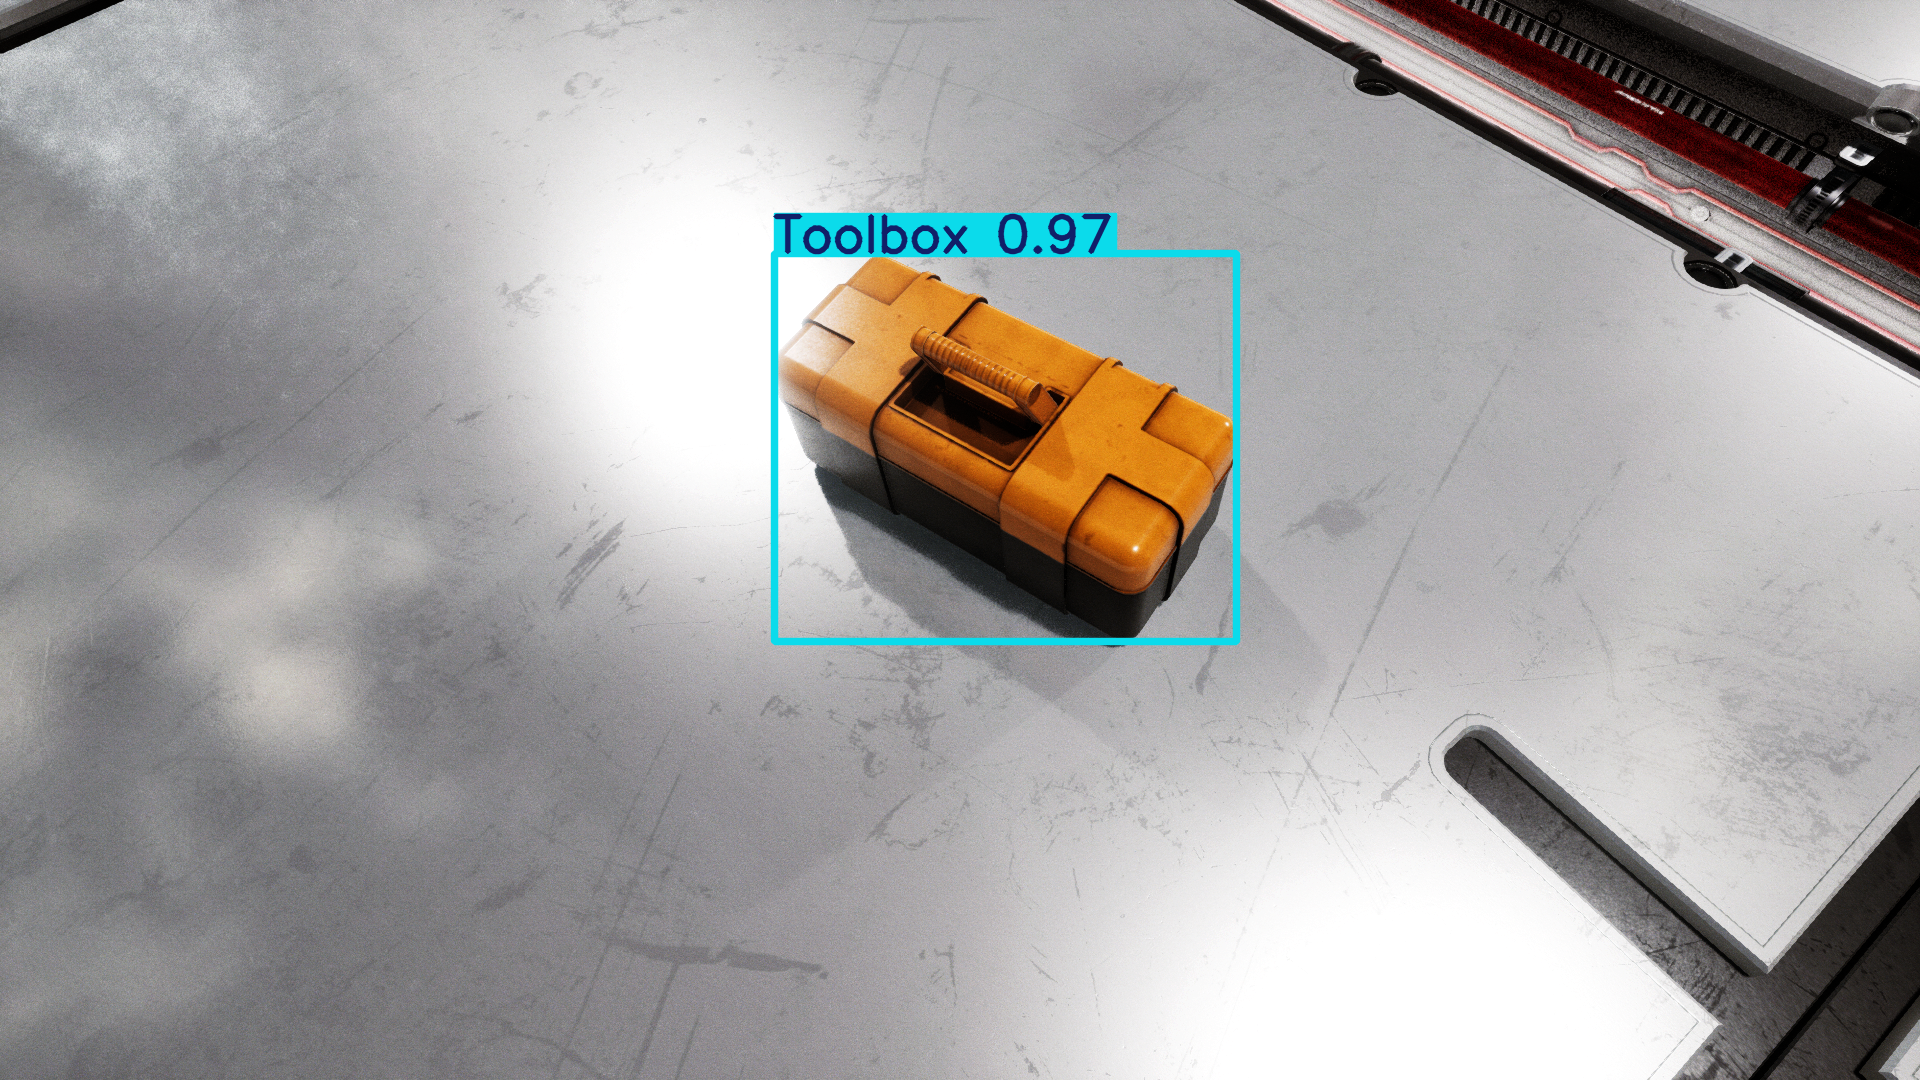

In [14]:
results = model('/kaggle/input/spaceshipobject-detection/data/val/images/000000006.png')

# If model returns a list, grab the first item
if isinstance(results, list):
    results[0].show()
else:
    results.show()

In [24]:
import os

# List all files and folders
for root, dirs, files in os.walk('/kaggle/working'):
    level = root.replace('/kaggle/working', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")

working/
  data.yaml
  yolo11n.pt
  calibration_image_sample_data_20x128x128x3_float32.npy
  yolov8m.pt
  full_working_dir.zip
  spaceship_equipment_detector_best.pt
  runs/
    detect/
      yolov8_map_optimized_run3/
        BoxF1_curve.png
        val_batch0_labels.jpg
        BoxR_curve.png
        val_batch1_pred.jpg
        BoxPR_curve.png
        confusion_matrix_normalized.png
        BoxP_curve.png
        val_batch2_labels.jpg
        confusion_matrix.png
        val_batch0_pred.jpg
        val_batch1_labels.jpg
        val_batch2_pred.jpg
      yolov8_map_optimized_run4/
        BoxF1_curve.png
        val_batch0_labels.jpg
        BoxR_curve.png
        val_batch1_pred.jpg
        BoxPR_curve.png
        confusion_matrix_normalized.png
        BoxP_curve.png
        val_batch2_labels.jpg
        confusion_matrix.png
        val_batch0_pred.jpg
        val_batch1_labels.jpg
        val_batch2_pred.jpg
      yolov8_map_optimized_run/
        BoxF1_curve.png
        train_batc

import os

zip_path = '/kaggle/working/33full_working_dir.zip'
if os.path.exists(zip_path):
    os.remove(zip_path)
    print(f"{zip_path} has been deleted.")
else:
    print("File not found.")

In [21]:
import os

zip_path = '/kaggle/working/33full_working_dir.zip'
if os.path.exists(zip_path):
    os.remove(zip_path)
    print(f"{zip_path} has been deleted.")
else:
    print("File not found.")

/kaggle/working/33full_working_dir.zip has been deleted.


In [25]:
!zip -r spaceship_app_package.zip /kaggle/working/data.yaml /kaggle/working/spaceship_equipment_detector_best.pt /kaggle/working/runs/

  adding: kaggle/working/data.yaml (deflated 49%)
  adding: kaggle/working/spaceship_equipment_detector_best.pt
zip I/O error: No space left on device
zip error: Output file write failure (unexpected error on zip file)


In [28]:
import shutil
paths_to_clear = [
    '/kaggle/working/full_working_dir.zip',
    '/kaggle/working/runs/detect/yolov8_map_optimized_run4',
    '/kaggle/working/calibration_image_sample_data_20x128x128x3_float32.npy'
    '/kaggle/working/runs/detect/yolov8_map_optimized_run3'
    '/kaggle/working/runs/detect/yolov8_map_optimized_run2'
]
for p in paths_to_clear:
    if os.path.exists(p):
        shutil.rmtree(p) if os.path.isdir(p) else os.remove(p)
        print(f"Deleted: {p}")


image 1/1 /kaggle/input/spaceshipobject-detection/data/test/images/000000049.png: 384x640 1 Fire Extinguisher, 1 Toolbox, 1 Oxygen Tank, 25.5ms
Speed: 2.2ms preprocess, 25.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Detected: Fire Extinguisher - Confidence: 0.94 - Box: 179, 238, 793, 476
Detected: Toolbox - Confidence: 0.94 - Box: 517, 41, 632, 110
Detected: Oxygen Tank - Confidence: 0.31 - Box: 1845, 1, 1915, 32


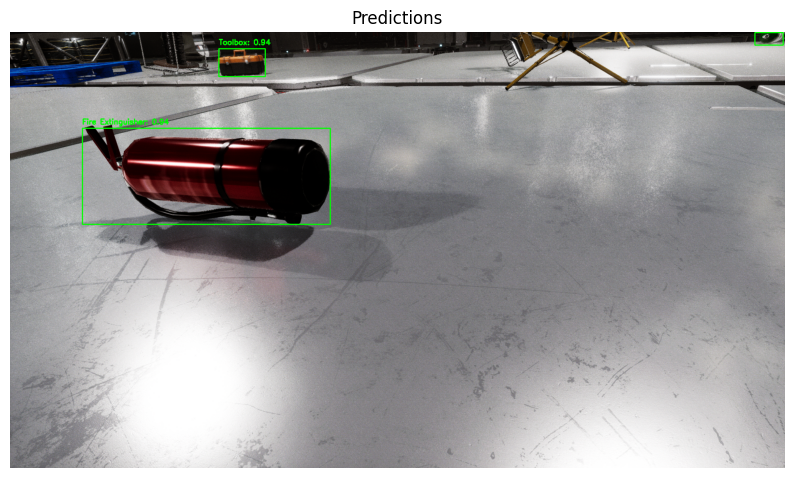

📸 Saved annotated image to: /kaggle/working/annotated_output.png


In [21]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your YOLOv8 model
model = YOLO('/kaggle/input/model/pytorch/default/1/spaceship_equipment_detector_best.pt')

# Define class labels (make sure this matches your model)
class_names = ['Fire Extinguisher', 'Toolbox', 'Oxygen Tank']

def test_image(image_path):
    # Run prediction
    results = model(image_path)

    # Load image using OpenCV
    img = cv2.imread(image_path)

    # Process detections
    for result in results:
        boxes = result.boxes
        if boxes is not None:
            for box in boxes:
                class_id = int(box.cls[0])
                confidence = float(box.conf[0])
                x1, y1, x2, y2 = map(int, box.xyxy[0])

                label = f"{class_names[class_id]}: {confidence:.2f}"
                color = (0, 255, 0)

                # Draw box and label
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

                print(f"Detected: {class_names[class_id]} - Confidence: {confidence:.2f} - Box: {x1}, {y1}, {x2}, {y2}")

    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show image inline using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Predictions")
    plt.show()

    # Optional: Save the image
    output_path = "/kaggle/working/annotated_output.png"
    cv2.imwrite(output_path, img)
    print(f"📸 Saved annotated image to: {output_path}")

# Run test
test_image('/kaggle/input/spaceshipobject-detection/data/test/images/000000049.png')


In [ ]:
# ✅ Step 1: Install dependencies
! pip install -q ultralytics tabulate

# ✅ Step 2: Import libraries
from ultralytics import YOLO
from tabulate import tabulate

# ✅ Step 3: Load your trained model
MODEL_PATH = "/kaggle/input/model/pytorch/default/1/spaceship_equipment_detector_best.pt"
model = YOLO(MODEL_PATH)

# ✅ Step 4: Run validation
DATA_YAML = "/kaggle/input/data/other/default/1/data.yaml"
results = model.val(data=DATA_YAML)

# ✅ Step 5: Extract key benchmark metrics
metrics = results.results_dict
print("\n📊 Model Performance Benchmarks\n")

print(f"Mean Precision       : {metrics['metrics/precision(B)']:.2%}")
print(f"Mean Recall          : {metrics['metrics/recall(B)']:.2%}")
print(f"mAP@0.5              : {metrics['metrics/mAP50(B)']:.2%}")
print(f"mAP@0.5:0.95         : {metrics['metrics/mAP50-95(B)']:.2%}")
print(f"Inference Speed      : {results.speed['inference']:.1f} ms/image")
print(f"Training Loss        : (Check training logs separately)\n")
print(f"Inference Speed      : {results.speed['inference']:.1f} ms/image")



Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2540.7±254.3 MB/s, size: 3199.4 KB)


val: Scanning /kaggle/input/spaceshipobject-detection/data/val/labels... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<00:00, 408.63it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/spaceshipobject-detection/data/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        154        206       0.98      0.881      0.934      0.819
     Fire Extinguisher         67         67      0.975      0.925      0.959      0.845
               Toolbox         60         60      0.982      0.899      0.914      0.859
           Oxygen Tank         79         79      0.985      0.817      0.929      0.754
Speed: 0.8ms preprocess, 11.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val7

📊 Model Performance Benchmarks

Mean Precision       : 98.04%
Mean Recall          : 88.06%
mAP@0.5              : 93.40%
mAP@0.5:0.95         : 81.92%
Inference Speed      : 11.9 ms/image
Training Loss        : (Check training logs separately)

Inference Speed      : 11.9 ms/image


Ultralytics 8.3.172 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2015.3±489.4 MB/s, size: 2482.2 KB)


val: Scanning /kaggle/input/spaceshipobject-detection/data/val/labels... 154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<00:00, 345.34it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/spaceshipobject-detection/data/val is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        154        206       0.98      0.881      0.934      0.819
     Fire Extinguisher         67         67      0.975      0.925      0.959      0.845
               Toolbox         60         60      0.982      0.899      0.914      0.859
           Oxygen Tank         79         79      0.985      0.817      0.929      0.754
Speed: 0.9ms preprocess, 11.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val9


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


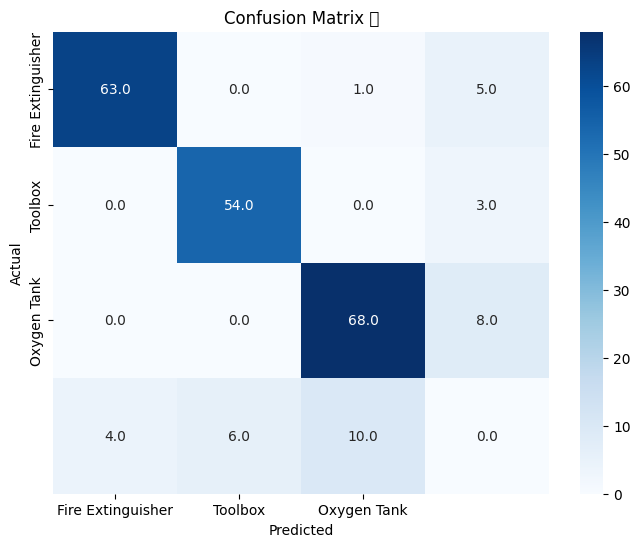

In [11]:
from ultralytics import YOLO
import seaborn as sns
import matplotlib.pyplot as plt

# Load model and validate
model = YOLO("/kaggle/input/model/pytorch/default/1/spaceship_equipment_detector_best.pt")
results = model.val(data="/kaggle/input/data/other/default/1/data.yaml")

# Access confusion matrix
conf_matrix = results.confusion_matrix.matrix  # [num_classes x num_classes]

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Blues", xticklabels=results.names.values(), yticklabels=results.names.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix 📊")
plt.show()